# Unit 5 - Financial Planning

In [4]:
'''

The following code will:

-pull in up to date (Sept 22, 2021) data for current prices of BTC, ETH, AGG, and SPY and calculate current savings based on current coins/shares held;
-calculate progress towards emergency fund goal (3 months household income);
-run 3 monte carlo simualtions for retirement projections with the following data:
    -$20,000 initial investment with holdings of 40% AGG and 60% SPY and a 30 year time horizon
    -$60,000 initial investment with holdings of 20% AGG and 80% SPY and a 5 year time horizon
    -$40,000 initial investment with holdings of 30% AGG and 70% SPY and a 10 year time horizon

'''

'\n\nThe following code will:\n\n-pull in up to date (Sept 22, 2021) data for current prices of BTC, ETH, AGG, and SPY and calculate current savings based on current coins/shares held;\n-calculate progress towards emergency fund goal (3 months household income);\n-run 3 monte carlo simualtions for retirement projections with the following data:\n    -$20,000 initial investment with holdings of 40% AGG and 60% SPY and a 30 year time horizon\n    -$60,000 initial investment with holdings of 20% AGG and 80% SPY and a 5 year time horizon\n    -$40,000 initial investment with holdings of 30% AGG and 70% SPY and a 10 year time horizon\n\n'

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
#import json library
import json

In [6]:
# Fetch current BTC price
requests.get(btc_url)
btc_response_data = requests.get(btc_url)
btc_response_content = btc_response_data.content
print(btc_response_content)

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18824300,\n\t\t\t"total_supply": 18824300,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 44765.0000000000000000,\n\t\t\t\t\t"volume_24h": 35510404215,\n\t\t\t\t\t"market_cap": 842136575448,\n\t\t\t\t\t"percentage_change_1h": -0.2833884417003630,\n\t\t\t\t\t"percentage_change_24h": 2.9530010556720400,\n\t\t\t\t\t"percentage_change_7d": -7.1012553827129500,\n\t\t\t\t\t"percent_change_1h": -0.2833884417003630,\n\t\t\t\t\t"percent_change_24h": 2.9530010556720400,\n\t\t\t\t\t"percent_change_7d": -7.1012553827129500\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 57178.3345,\n\t\t\t\t\t"volume_24h": 45357439303.8195,\n\t\t\t\t\t"market_cap": 1075661047819.73,\n\t\t\t\t\t"percent_change_1h": -0.2833884417003630,\n\t\t\t\t\t"percent_change_24h": 2.9530010556720400,\n\t\t\t\t\t"

In [7]:
# Format BTC data as a raw json file
btc_data = btc_response_data.json()
print(btc_data)

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 18824300, 'total_supply': 18824300, 'max_supply': 21000000, 'quotes': {'USD': {'price': 44765.0, 'volume_24h': 35510404215, 'market_cap': 842136575448, 'percentage_change_1h': -0.283388441700363, 'percentage_change_24h': 2.95300105567204, 'percentage_change_7d': -7.10125538271295, 'percent_change_1h': -0.283388441700363, 'percent_change_24h': 2.95300105567204, 'percent_change_7d': -7.10125538271295}, 'CAD': {'price': 57178.3345, 'volume_24h': 45357439303.8195, 'market_cap': 1075661047819.73, 'percent_change_1h': -0.283388441700363, 'percent_change_24h': 2.95300105567204, 'percent_change_7d': -7.10125538271295}}, 'last_updated': 1632430747}}, 'metadata': {'timestamp': 1632430747, 'num_cryptocurrencies': 3105, 'error': None}}


In [8]:
# add indents to make data easier to read
print(json.dumps(btc_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18824300,
            "total_supply": 18824300,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 44765.0,
                    "volume_24h": 35510404215,
                    "market_cap": 842136575448,
                    "percentage_change_1h": -0.283388441700363,
                    "percentage_change_24h": 2.95300105567204,
                    "percentage_change_7d": -7.10125538271295,
                    "percent_change_1h": -0.283388441700363,
                    "percent_change_24h": 2.95300105567204,
                    "percent_change_7d": -7.10125538271295
                },
                "CAD": {
                    "price": 57178.3345,
                    "volume_24h": 45357439303.8195,
                   

In [9]:
# Call current BTC price (CDN) and print current value of BTC holdings
btc_current_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
my_btc_value = btc_current_price * my_btc
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")

The current value of your 1.2 BTC is $68614.00


In [10]:
# Fetch current ETH price
requests.get(eth_url)
eth_response_data = requests.get(eth_url)
eth_response_content = eth_response_data.content
print(eth_response_content)


b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"symbol": "ETH",\n\t\t\t"website_slug": "ethereum",\n\t\t\t"rank": 2,\n\t\t\t"circulating_supply": 117646033,\n\t\t\t"total_supply": 117646033,\n\t\t\t"max_supply": 0,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 3145.4900000000000000,\n\t\t\t\t\t"volume_24h": 20999620364,\n\t\t\t\t\t"market_cap": 369590122403,\n\t\t\t\t\t"percentage_change_1h": -0.4190543312480840,\n\t\t\t\t\t"percentage_change_24h": 3.7436511468362600,\n\t\t\t\t\t"percentage_change_7d": -12.5273151858204000,\n\t\t\t\t\t"percent_change_1h": -0.4190543312480840,\n\t\t\t\t\t"percent_change_24h": 3.7436511468362600,\n\t\t\t\t\t"percent_change_7d": -12.5273151858204000\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 4017.734377,\n\t\t\t\t\t"volume_24h": 26822815090.9372,\n\t\t\t\t\t"market_cap": 472077463345.352,\n\t\t\t\t\t"percent_change_1h": -0.4190543312480840,\n\t\t\t\t\t"percent_change_24h": 3.7436511468362600,\n\t\t\t

In [11]:
# Format BTC data as a raw json file
eth_data = eth_response_data.json()
print(eth_data)

{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 117646033, 'total_supply': 117646033, 'max_supply': 0, 'quotes': {'USD': {'price': 3145.49, 'volume_24h': 20999620364, 'market_cap': 369590122403, 'percentage_change_1h': -0.419054331248084, 'percentage_change_24h': 3.74365114683626, 'percentage_change_7d': -12.5273151858204, 'percent_change_1h': -0.419054331248084, 'percent_change_24h': 3.74365114683626, 'percent_change_7d': -12.5273151858204}, 'CAD': {'price': 4017.734377, 'volume_24h': 26822815090.9372, 'market_cap': 472077463345.352, 'percent_change_1h': -0.419054331248084, 'percent_change_24h': 3.74365114683626, 'percent_change_7d': -12.5273151858204}}, 'last_updated': 1632430751}}, 'metadata': {'timestamp': 1632430751, 'num_cryptocurrencies': 3105, 'error': None}}


In [12]:
# add indents to make data easier to read
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 117646033,
            "total_supply": 117646033,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 3145.49,
                    "volume_24h": 20999620364,
                    "market_cap": 369590122403,
                    "percentage_change_1h": -0.419054331248084,
                    "percentage_change_24h": 3.74365114683626,
                    "percentage_change_7d": -12.5273151858204,
                    "percent_change_1h": -0.419054331248084,
                    "percent_change_24h": 3.74365114683626,
                    "percent_change_7d": -12.5273151858204
                },
                "CAD": {
                    "price": 4017.734377,
                    "volume_24h": 26822815090.9372,
               

In [13]:
# Call curent BTC price (CDN) and print current value of BTC holdings
eth_current_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]
my_eth_value = eth_current_price * my_eth
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 5.3 ETH is $21293.99


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [14]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [15]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [16]:
# Format current date as ISO format
today = pd.Timestamp("2021-09-22", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

df_my_portfolio = alpaca.get_barset(
     tickers,
    timeframe,
    limit = 1000
).df

# Preview DataFrame
df_my_portfolio

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-10-03 00:00:00-04:00  109.46  109.540  109.4000  109.520  2243369.0   
2017-10-04 00:00:00-04:00  109.56  109.570  109.4100  109.500  2130907.0   
2017-10-05 00:00:00-04:00  109.54  109.540  109.3701  109.440  1586971.0   
2017-10-06 00:00:00-04:00  109.22  109.420  109.1499  109.290  1587251.0   
2017-10-09 00:00:00-04:00  109.35  109.420  109.3146  109.400  1000706.0   
...                           ...      ...       ...      ...        ...   
2021-09-17 00:00:00-04:00  115.80  115.875  115.7428  115.850  4662040.0   
2021-09-20 00:00:00-04:00  116.02  116.170  115.9750  116.120  4463038.0   
2021-09-21 00:00:00-04:00  116.13  116.170  116.0450  116.135  4455403.0   
2021-09-22 00:00:00-04:00  116.11  116.250  116.0050  116.190  6079965.0   
2021-09-23 00:00:00-04:00  115.93  115.940  115.5700  115.570  7516613.0   

                              SPY                                        
                             open    high      low   close       volume  
time                                                                     
2017-10-03 00:00:00-04:00     NaN     NaN      NaN     NaN          NaN  
2017-10-04 00:00:00-04:00  252.69  253.44  252.560  253.16   30217246.0  
2017-10-05 00:00:00-04:00  253.51  254.68  253.400  254.64   45350955.0  
2017-10-06 00:00:00-04:00  254.15  254.46  253.850  254.40   40706912.0  
2017-10-09 00:00:00-04:00  254.63  254.70  253.650  253.96   23554888.0  
...                           ...     ...      ...     ...          ...  
2021-09-17 00:00:00-04:00  444.92  445.37  441.020  441.41  100861596.0  
2021-09-20 00:00:00-04:00  434.88  436.56  428.860  434.07  149948277.0  
2021-09-21 00:00:00-04:00  436.53  437.91  433.070  433.67   82418070.0  
2021-09-22 00:00:00-04:00  436.05  440.03  433.747  437.83   91135278.0  
2021-09-23 00:00:00-04:00  439.84  444.89  439.600  443.13   67408294.0  

[1001 rows x 10 columns]

In [17]:
# Pick AGG and SPY close prices
agg_close_price = df_my_portfolio["AGG"]["close"][-1]
spy_close_price = df_my_portfolio["SPY"]["close"][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.57
Current SPY closing price: $443.13


In [18]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22156.50
The current value of your 200 AGG shares is $23114.00


### Savings Health Analysis

In [19]:
# Set monthly household income
monthly_household_income = 12000

# Consolidate financial assets data
crypto_value = (my_btc_value + my_eth_value)
my_crypto_value = round(crypto_value, 2)
share_value = my_agg_value + my_spy_value
my_share_value = round(share_value, 2)
# Create savings DataFrame
savings_data = {
    "amount":[my_crypto_value,my_share_value]
}
index = ["crypto", "shares"]
df_savings = pd.DataFrame(savings_data, index=index)

# Display savings DataFrame
display(df_savings)
#print(my_share_value)

,amount
crypto,89907.99
shares,45270.50


array([<AxesSubplot:ylabel='amount'>], dtype=object)

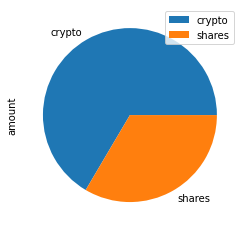

In [20]:
# Plot savings pie chart
df_savings.plot(kind="pie", subplots=True)

In [21]:
# Set ideal emergency fund
emergency_fund = monthly_household_income * 3

# Calculate total amount of savings
total_savings = my_crypto_value + my_share_value
shortfall_or_surplus = round((total_savings - emergency_fund),2)

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! You have surplus emergency savings of ${shortfall_or_surplus} ")
elif total_savings == emergency_fund:
    print("Congratulations, you have sufficient emergency savings!")
elif total_savings < emergency_fund:
    print(f"Save an additional ${shortfall_or_surplus} to build up your emergency fund")

Congratulations! You have surplus emergency savings of $99178.49 


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [22]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-09-22', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-09-22', tz='America/New_York').isoformat()

In [23]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
start = pd.Timestamp("2016-09-22", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-09-22", tz="America/New_York").isoformat()
df_stock_data = alpaca.get_barset(
     tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df
# Display sample data
df_stock_data.head()

AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2017-10-02 00:00:00-04:00  109.43  109.47  109.3300  109.425  3840216.0   
2017-10-03 00:00:00-04:00  109.46  109.54  109.4000  109.520  2243369.0   
2017-10-04 00:00:00-04:00  109.56  109.57  109.4100  109.500  2130907.0   
2017-10-05 00:00:00-04:00  109.54  109.54  109.3701  109.440  1586971.0   
2017-10-06 00:00:00-04:00  109.22  109.42  109.1499  109.290  1587251.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-10-02 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2017-10-03 00:00:00-04:00  252.46  252.89  252.23  252.85  33875099.0  
2017-10-04 00:00:00-04:00  252.69  253.44  252.56  253.16  30217246.0  
2017-10-05 00:00:00-04:00  253.51  254.68  253.40  254.64  45350955.0  
2017-10-06 00:00:00-04:00  254.15  254.46  253.85  254.40  40706912.0

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_of_sims = 500
weights = [0.4, 0.6]

MC_30_years = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_of_sims,
    weights = weights,
    num_trading_days = 252 * 30
)

In [25]:
# Printing the simulation input data
MC_30_years.portfolio_data.head()

AGG                                        \
                             open    high       low    close     volume   
time                                                                      
2017-10-02 00:00:00-04:00  109.43  109.47  109.3300  109.425  3840216.0   
2017-10-03 00:00:00-04:00  109.46  109.54  109.4000  109.520  2243369.0   
2017-10-04 00:00:00-04:00  109.56  109.57  109.4100  109.500  2130907.0   
2017-10-05 00:00:00-04:00  109.54  109.54  109.3701  109.440  1586971.0   
2017-10-06 00:00:00-04:00  109.22  109.42  109.1499  109.290  1587251.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-10-02 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-10-03 00:00:00-04:00     0.000868  252.46  252.89  252.23  252.85   
2017-10-04 00:00:00-04:00    -0.000183  252.69  253.44  252.56  253.16   
2017-10-05 00:00:00-04:00    -0.000548  253.51  254.68  253.40  254.64   
2017-10-06 00:00:00-04:00    -0.001371  254.15  254.46  253.85  254.40   

                                                    
                               volume daily_return  
time                                                
2017-10-02 00:00:00-04:00         NaN          NaN  
2017-10-03 00:00:00-04:00  33875099.0          NaN  
2017-10-04 00:00:00-04:00  30217246.0     0.001226  
2017-10-05 00:00:00-04:00  45350955.0     0.005846  
2017-10-06 00:00:00-04:00  40706912.0    -0.000943

In [26]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989456,0.996557,0.998033,0.997201,0.989168,1.000476,1.009014,1.002441,0.987232,1.001219,...,0.996396,1.002639,0.993637,1.002465,0.992741,1.013900,1.004770,0.989891,1.005420,1.012222
2,1.001593,1.004680,1.000067,0.997036,1.001741,1.006310,1.003952,1.004825,0.981656,0.998735,...,1.005911,0.996199,0.990694,1.006675,1.006250,1.013721,0.995975,0.988589,1.007238,1.013309
3,1.000701,1.008608,1.001862,0.980487,1.009112,1.016285,1.020318,1.000767,0.976989,1.000934,...,1.017500,1.014725,0.989826,1.020259,1.005798,1.032730,1.004575,0.994337,1.016110,1.013014
4,0.997607,1.000311,1.003595,0.987781,1.010473,1.024322,1.020152,1.011245,0.983048,1.002041,...,1.023521,1.006961,0.998120,1.021020,0.994132,1.025841,1.005442,1.009582,1.018882,1.013701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,19.661590,26.423948,52.276043,27.832806,62.035518,47.156705,5.226858,46.393870,4.517651,13.322014,...,21.537754,11.182620,15.946468,43.698905,6.247650,11.570389,41.578995,23.558074,5.340282,19.255557
7557,19.591321,26.320739,52.089127,28.016046,61.307499,47.216909,5.184549,46.928870,4.452196,13.262767,...,21.496372,11.201665,16.038295,43.412583,6.313292,11.732477,41.404435,23.495505,5.400828,19.260458
7558,19.691470,26.734742,51.991189,28.037883,61.371671,47.386303,5.171785,46.937312,4.517963,13.150375,...,21.211082,11.213365,15.961609,43.972927,6.231450,11.729754,41.359369,23.336311,5.426762,19.409693
7559,19.709213,26.893943,51.847022,27.771928,61.170342,47.257351,5.201362,46.637774,4.535400,13.102886,...,21.351050,11.357340,15.855708,43.920304,6.288598,11.601852,40.899972,23.380129,5.443821,19.163946


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

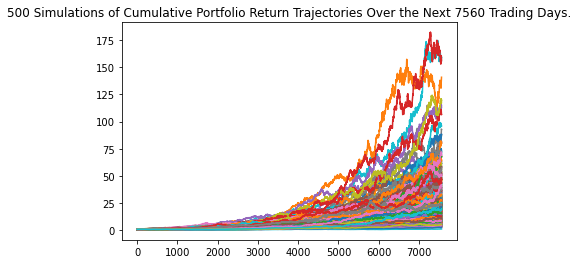

In [27]:
# Plot simulation outcomes
MC_30_years.plot_simulation()

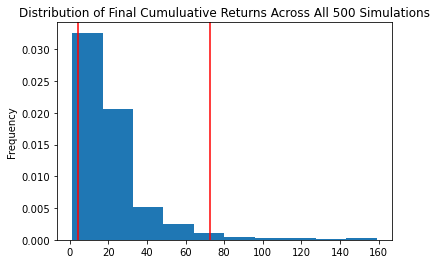

In [28]:
# Plot probability distribution and confidence intervals
dist_plot_30_year = MC_30_years.plot_distribution()

### Retirement Analysis

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics = MC_30_years.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics)

count           500.000000
mean             22.626062
std              19.803718
min               1.304069
25%              11.417307
50%              16.946695
75%              27.152549
max             158.836759
95% CI Lower      4.566826
95% CI Upper     72.557975
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(initial_investment * summary_statistics["95% CI Lower"], 2)
ci_upper = round(initial_investment * summary_statistics["95% CI Upper"], 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $91336.52 and $1451159.49


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [31]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_2 = round(initial_investment_2 * summary_statistics["95% CI Lower"], 2)
ci_upper_2 = round(initial_investment_2 * summary_statistics["95% CI Upper"], 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_2} and ${ci_upper_2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $137004.77 and $2176739.24


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns, increasing equity exposure from 60% to 80%
num_of_sims = 500
weights_5_year = [0.2, 0.8]

MC_5_years = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_of_sims,
    weights = weights_5_year,
    num_trading_days = 252 * 5
)

In [33]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989589,0.996071,0.998469,1.017646,1.004306,0.985718,1.002610,0.988185,1.010688,1.015275,...,0.999558,1.007276,0.976239,1.018038,0.986698,0.999634,0.996422,0.984901,1.015369,0.988381
2,0.980572,1.017464,0.985361,1.004722,1.021956,0.989107,1.013971,0.992178,1.009061,1.007369,...,1.011505,1.019325,0.972468,1.024518,1.005147,0.987488,1.008177,0.981259,1.025344,0.984696
3,0.980187,1.003696,0.981642,1.022324,1.037016,1.002753,1.016715,0.989864,1.009191,1.010804,...,1.005069,1.006531,0.967890,1.037480,1.020898,0.984421,1.015078,0.994752,0.990564,0.974895
4,0.982805,1.005674,0.979882,1.026890,1.038860,0.992680,1.009843,0.995699,1.010694,1.020936,...,1.018683,0.996614,0.986119,1.039509,1.024519,0.997415,1.009220,1.025621,0.981723,0.985058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.324148,1.110976,1.954720,1.317690,2.324519,1.394651,1.106647,1.405699,1.730807,0.937430,...,1.727399,1.342938,2.388459,1.413138,1.904359,0.790342,1.502509,0.909065,1.859213,1.889688
1257,1.341082,1.130505,1.958601,1.337500,2.349470,1.389878,1.103399,1.395007,1.735636,0.953574,...,1.751166,1.368132,2.394814,1.416754,1.905090,0.787587,1.502999,0.908296,1.857017,1.882411
1258,1.331559,1.139061,1.927009,1.355807,2.340856,1.396982,1.098555,1.357746,1.743411,0.965534,...,1.760088,1.354281,2.379458,1.400209,1.936441,0.770804,1.485213,0.888011,1.861193,1.836840
1259,1.316195,1.139409,1.929043,1.359247,2.375828,1.402641,1.104939,1.357190,1.734580,0.961551,...,1.764520,1.349006,2.333588,1.406975,1.941745,0.787080,1.493323,0.889434,1.863936,1.834299


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

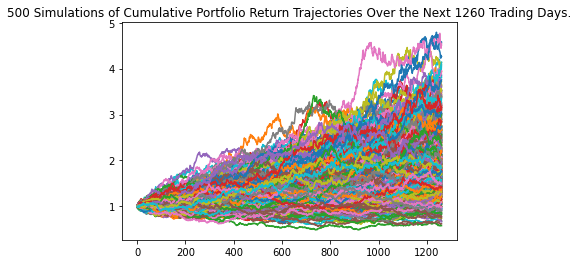

In [34]:
# Plot simulation outcomes
MC_5_years.plot_simulation()

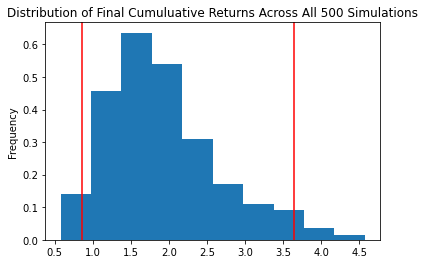

In [35]:
# Plot probability distribution and confidence intervals
dist_plot_5_year = MC_5_years.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics_5_year = MC_5_years.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics_5_year)

count           500.000000
mean              1.918031
std               0.724298
min               0.577634
25%               1.400276
50%               1.787804
75%               2.280384
max               4.572822
95% CI Lower      0.859433
95% CI Upper      3.641808
Name: 1260, dtype: float64


In [37]:
# Set initial investment, increase intial investment to 60000
initial_investment_5_year = 60000 

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5_year = round(initial_investment_5_year * summary_statistics_5_year["95% CI Lower"], 2)
ci_upper_5_year = round(initial_investment_5_year * summary_statistics_5_year["95% CI Upper"], 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5_year} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5_year} and ${ci_upper_5_year}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $51565.98 and $218508.5


### Ten Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns,increasing equity exposure from intial 60% to 70%
num_of_sims = 500
weights_10_year = [0.3, 0.7]

MC_10_years = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_of_sims,
    weights = weights_10_year,
    num_trading_days = 252 * 10
)

In [39]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988965,1.012974,0.999032,1.005650,1.008528,0.984911,1.003475,1.002468,0.991699,0.996445,...,1.000238,1.007148,1.010611,1.005450,1.005356,0.998414,0.990864,1.003307,1.011435,0.989925
2,0.992913,1.029688,0.988571,1.000841,1.012297,0.984379,0.997805,0.995620,0.985428,1.004368,...,1.008521,1.027487,1.008776,1.008929,1.002187,0.986974,0.980261,0.994501,1.006977,0.998513
3,0.984143,1.025703,0.995974,0.986499,1.023711,0.982509,0.996370,0.982951,0.989293,1.009882,...,1.000719,1.043920,1.019637,0.984081,1.003080,0.986038,0.994237,1.004581,1.019258,1.010324
4,0.978734,1.031676,0.995332,0.995347,1.019201,0.984518,0.995230,0.982479,0.984502,1.012988,...,0.996298,1.043918,1.013083,0.972508,1.006564,0.986643,0.998798,1.005804,1.009143,1.009663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.316311,1.949153,4.143700,5.199047,5.516254,1.934896,2.122711,1.673601,2.429052,2.669238,...,2.035157,6.551208,1.634537,3.751257,2.538175,1.879275,2.462804,3.298791,4.888776,2.877461
2517,1.311760,1.960033,4.127604,5.107225,5.533347,1.937410,2.124540,1.657704,2.438409,2.629590,...,2.047766,6.508322,1.638438,3.726424,2.551582,1.914390,2.487355,3.326322,4.952144,2.934739
2518,1.314331,1.950866,4.158835,5.207200,5.487069,1.936439,2.099819,1.652973,2.403368,2.599817,...,2.038841,6.495201,1.613005,3.759259,2.545873,1.919735,2.470673,3.309526,4.984121,2.898351
2519,1.290166,1.927659,4.123852,5.321605,5.393536,1.915621,2.125654,1.645464,2.429243,2.578458,...,2.023200,6.436015,1.627335,3.730926,2.522693,1.920895,2.467518,3.260137,5.081148,2.931734


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

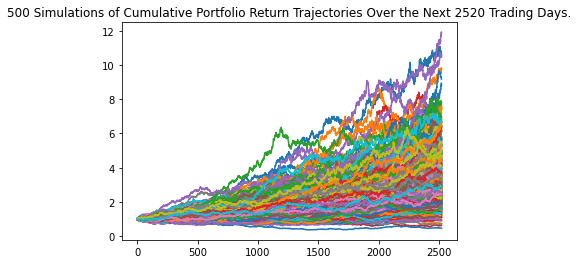

In [40]:
# Plot simulation outcomes
MC_10_years.plot_simulation()

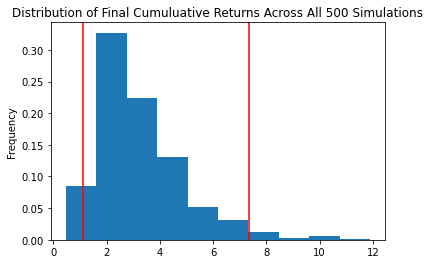

In [41]:
# Plot probability distribution and confidence intervals
dist_plot_10_year = MC_10_years.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics_10_year = MC_10_years.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics_10_year)

count           500.000000
mean              3.240364
std               1.643365
min               0.469668
25%               2.057249
50%               2.829229
75%               4.073974
max              11.902278
95% CI Lower      1.131215
95% CI Upper      7.362743
Name: 2520, dtype: float64


In [43]:
# Set initial investment, adjusted to $40,000
initial_investment_10_year = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10_year = round(initial_investment_10_year * summary_statistics_10_year["95% CI Lower"], 2)
ci_upper_10_year = round(initial_investment_10_year * summary_statistics_10_year["95% CI Upper"], 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10_year} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10_year} and ${ci_upper_10_year}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 10 years will end within in the range of $45248.62 and $294509.73
